## geo_mozambique_1

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

import osmnx as ox

import fiona

import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask

import cartopy as cp
from shapely.geometry import mapping
from pathlib import Path

### Data understanding

#### Download shapefiles

In [2]:
%%bash 
# in terminal, download and unzip 10m country boundaries shapes from Natural Earth #TODO (Lee) - format long url
wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip -P ~/Documents/projects_code/geo_mozambique/data/shapes/
unzip ~/Documents/projects_code/geo_mozambique/data/shapes/ne_10m_admin_0_countries.zip -d ~/Documents/projects_code/geo_mozambique/data/shapes/

Archive:  /Users/lee/Documents/projects_code/geo_mozambique/data/shapes/ne_10m_admin_0_countries.zip


--2019-09-17 19:53:19--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 66.147.242.194
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|66.147.242.194|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip [following]
--2019-09-17 19:53:20--  http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 146.201.97.163
Connecting to naciscdn.org (naciscdn.org)|146.201.97.163|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip [following]
--2019-09-17 19:53:20--  https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
Connecting to naciscdn.org (n

CalledProcessError: Command 'b'# in terminal, download and unzip 10m country boundaries shapes from Natural Earth #TODO (Lee) - format long url\nwget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip -P ~/Documents/projects_code/geo_mozambique/data/shapes/\nunzip ~/Documents/projects_code/geo_mozambique/data/shapes/ne_10m_admin_0_countries.zip -d ~/Documents/projects_code/geo_mozambique/data/shapes/\n'' returned non-zero exit status 1.

In [ ]:
# specify directory where shapefiles located
shapes = '/Users/lee/Documents/projects_code/geo_mozambique/data/shapes/ne_10m_admin_0_countries.shp'

In [8]:
# create geodataframe, a pandas-like tabular data structure that contains a geoseries
# geopandas provides python operations that would otherwise require a GIS database
gdf = gpd.read_file(shapes)

# inspect geopandas dataframe
gdf.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,(POLYGON ((117.7036079039552 4.163414542001791...
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,(POLYGON ((117.7036079039552 4.163414542001791...
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,(POLYGON ((-69.51008875199994 -17.506588197999...


In [15]:
gdf.geometry[:5]

0    (POLYGON ((117.7036079039552 4.163414542001791...
1    (POLYGON ((117.7036079039552 4.163414542001791...
2    (POLYGON ((-69.51008875199994 -17.506588197999...
3    POLYGON ((-69.51008875199994 -17.5065881979999...
4    (POLYGON ((-69.51008875199994 -17.506588197999...
Name: geometry, dtype: object

In [16]:
# confirm the coordinate reference system (CRS)
# ouput is EPSG code 4326, which is WGS84
gdf.crs

{'init': 'epsg:4326'}

In [5]:
# subset shape file to only include country borders of Mozambique
gdf_mozambique = gdf[gdf['ADMIN']=='Mozambique']

In [13]:
#inspect geometry
gdf_mozambique.geometry

122    (POLYGON ((32.11388431800009 -26.8400143429999...
Name: geometry, dtype: object

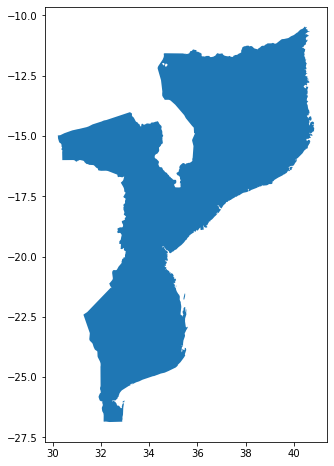

In [11]:
# plot Mozambique shape file 
fig, ax = plt.subplots(figsize=(8,8))

# set aspect to equal when plotting directly with pyplot
ax.set_aspect('equal')
_ = gdf_mozambique.plot(ax=ax, legend=True)

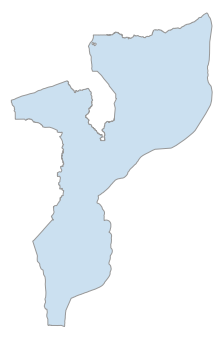

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1aeb64080>)

In [28]:
# alternatively, we could also do this with open street map
# oxmnx downloads shapes from OpenStreetMap (as geopandas GeoDataFrames) in one line of Python code
# get area extent - a polygon - of Mozambique
mozambique_area = ox.gdf_from_place('Mozambique')
ox.plot_shape(ox.project_gdf(mozambique_area))
# graph = ox.graph_from_place(place_name, which_result=2)

#### Open file

In [ ]:
with rasterio.open('<filename>', 'w',
                    driver='GTiff',
                    height=Z.shape[0],
                    width=Z.shape[0],
                    count=1,
                    dtype=Z.dtype,
                    crs='proj=latlong', # this is a "proj4" string defining the projection
                    transform=transform,
                    ) as dst:
    dst.write(Z, 1)

### Make raster using shapefile

In [ ]:
with fiona.open("tests/data/box.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]